# Problem statement : The goal for this competition is to predict whether an applicant is approved for a loan.

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data.head(5)

id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0  
2                         N                          10            0  
3                         N                           5            0  
4                         N                           3            0

In [4]:
#id not needed hence dropping it
data.drop('id',axis=1,inplace=True)

In [5]:
data.size

703740

In [6]:
data.shape

(58645, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [8]:
data.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  58645.000000   5.864500e+04       58645.000000  58645.000000   
mean      27.550857   6.404617e+04           4.701015   9217.556518   
std        6.033216   3.793111e+04           3.959784   5563.807384   
min       20.000000   4.200000e+03           0.000000    500.000000   
25%       23.000000   4.200000e+04           2.000000   5000.000000   
50%       26.000000   5.800000e+04           4.000000   8000.000000   
75%       30.000000   7.560000e+04           7.000000  12000.000000   
max      123.000000   1.900000e+06         123.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   58645.000000         58645.000000                58645.000000   
mean       10.677874             0.159238                    5.813556   
std         3.034697             0.091692                    4.029196   
min         5.420000             0.000000                    2.000000   
25%         7.880000             0.090000                    3.000000   
50%        10.750000             0.140000                    4.000000   
75%        12.990000             0.210000                    8.000000   
max        23.220000             0.830000                   30.000000   

        loan_status  
count  58645.000000  
mean       0.142382  
std        0.349445  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [9]:
data.duplicated().sum()

0

No duplicates are there

In [10]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

No missing values present

In [11]:
#changing the data type of object to int
cat_type=[]
for i in data.columns:
    if data[i].dtypes=="O":
        cat_type.append(i)
cat_type

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [12]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [13]:

data['person_home_ownership']=data['person_home_ownership'].map({'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3})

if in person_home_ownership any unknown value comes then put it in other

In [14]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [15]:
data['loan_intent']=data['loan_intent'].map({'EDUCATION':0,'MEDICAL':1,'PERSONAL':2,'VENTURE':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5})

If loan_intent have any unknown value then shift it to  personal section

In [16]:
data['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [17]:
data['loan_grade']=data['loan_grade'].map({'unknown':0,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

If any unknown comes in loan_grade then we shift it to unknown

In [18]:
data['cb_person_default_on_file'].value_counts()

cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64

In [19]:
data['cb_person_default_on_file_NO']=data['cb_person_default_on_file'].map({'N':1,'Y':0})
data['cb_person_default_on_file_YES']=data['cb_person_default_on_file'].map({'Y':1,'N':0})
data.drop('cb_person_default_on_file',axis=1,inplace=True)

If any missing value comes then it is no

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_age                     58645 non-null  int64  
 1   person_income                  58645 non-null  int64  
 2   person_home_ownership          58645 non-null  int64  
 3   person_emp_length              58645 non-null  float64
 4   loan_intent                    58645 non-null  int64  
 5   loan_grade                     58645 non-null  int64  
 6   loan_amnt                      58645 non-null  int64  
 7   loan_int_rate                  58645 non-null  float64
 8   loan_percent_income            58645 non-null  float64
 9   cb_person_cred_hist_length     58645 non-null  int64  
 10  loan_status                    58645 non-null  int64  
 11  cb_person_default_on_file_NO   58645 non-null  int64  
 12  cb_person_default_on_file_YES  58645 non-null 

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

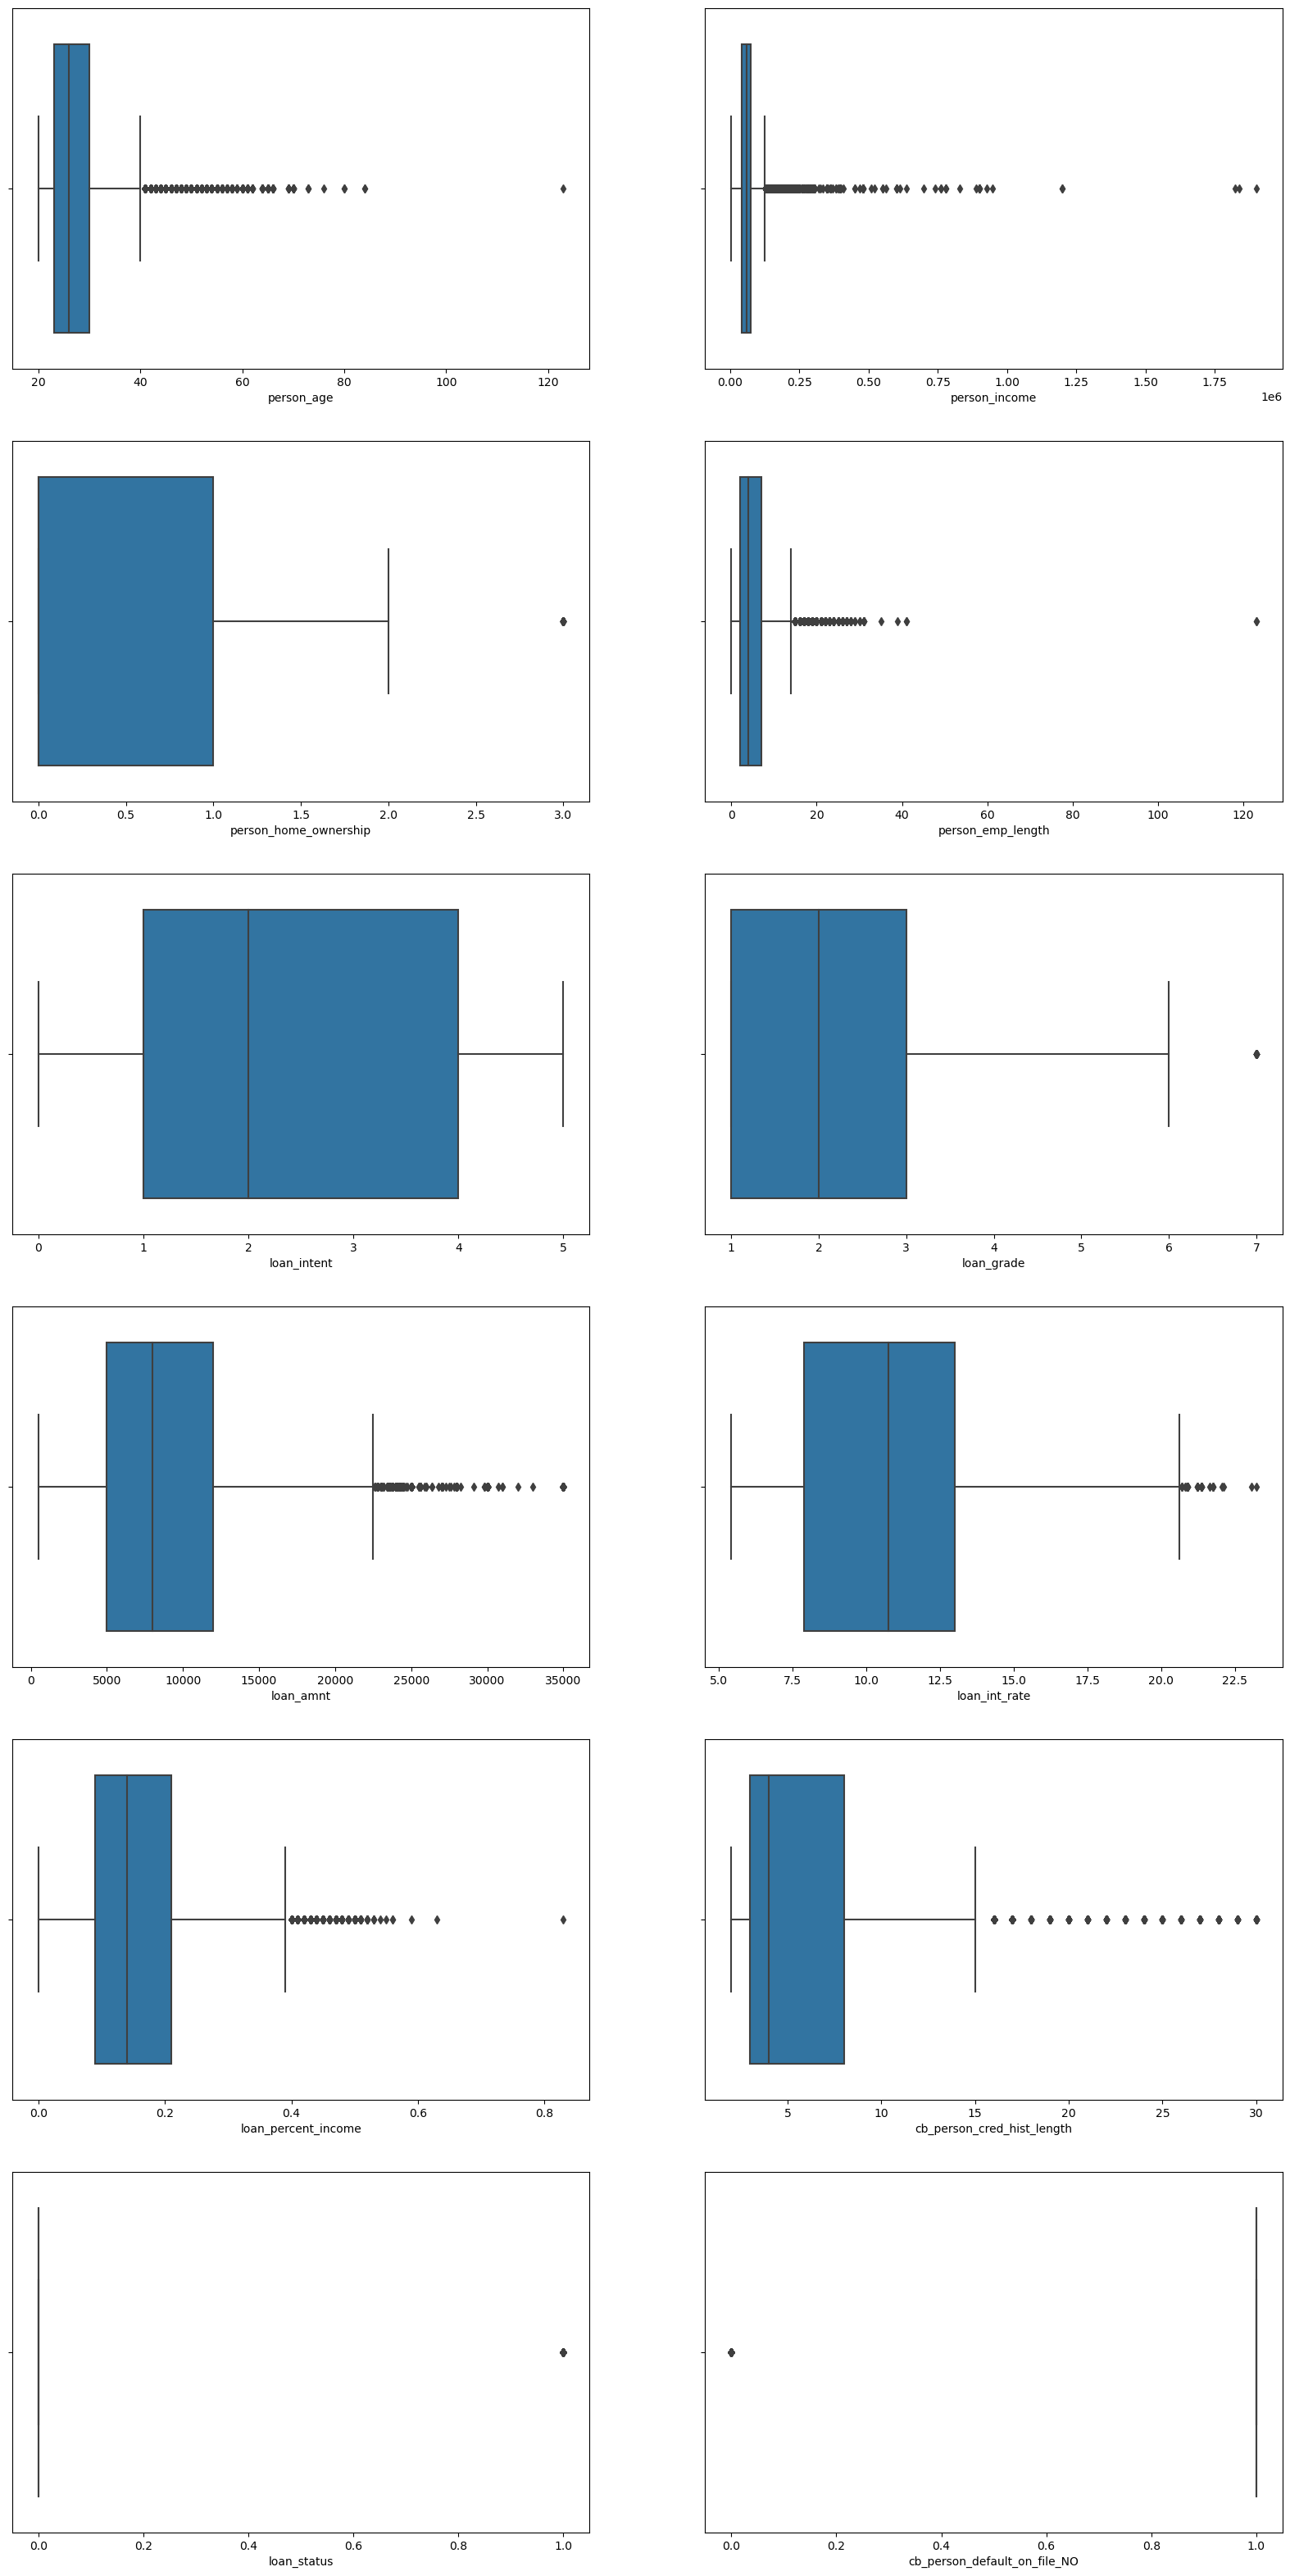

In [22]:
#for outlier
fig,axes = plt.subplots(6,2,figsize=(20,40),sharey=True)
k=0
for i in range(6):
    for j in range(2):
        sns.boxplot(x=data.columns[k],data=data,ax=axes[i][j])
        plt.plot()
        k+=1

Outliers is present in some of the columns 

In [23]:
outliers_present=['person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

In [24]:
#using iqr for outlier deletion
import numpy as np
for i in outliers_present:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    maximum=q3+1.5*iqr
    minimum=q1-1.5*iqr
    
    data[i]= np.where(data[i]>=maximum,data[i].median(),data[i])
    data[i]= np.where(data[i]<=minimum,data[i].median(),data[i])
    

In [25]:
#if age>100 then we are taking it till 100
data['person_age']=np.where(data['person_age']>100,100,data['person_age'])


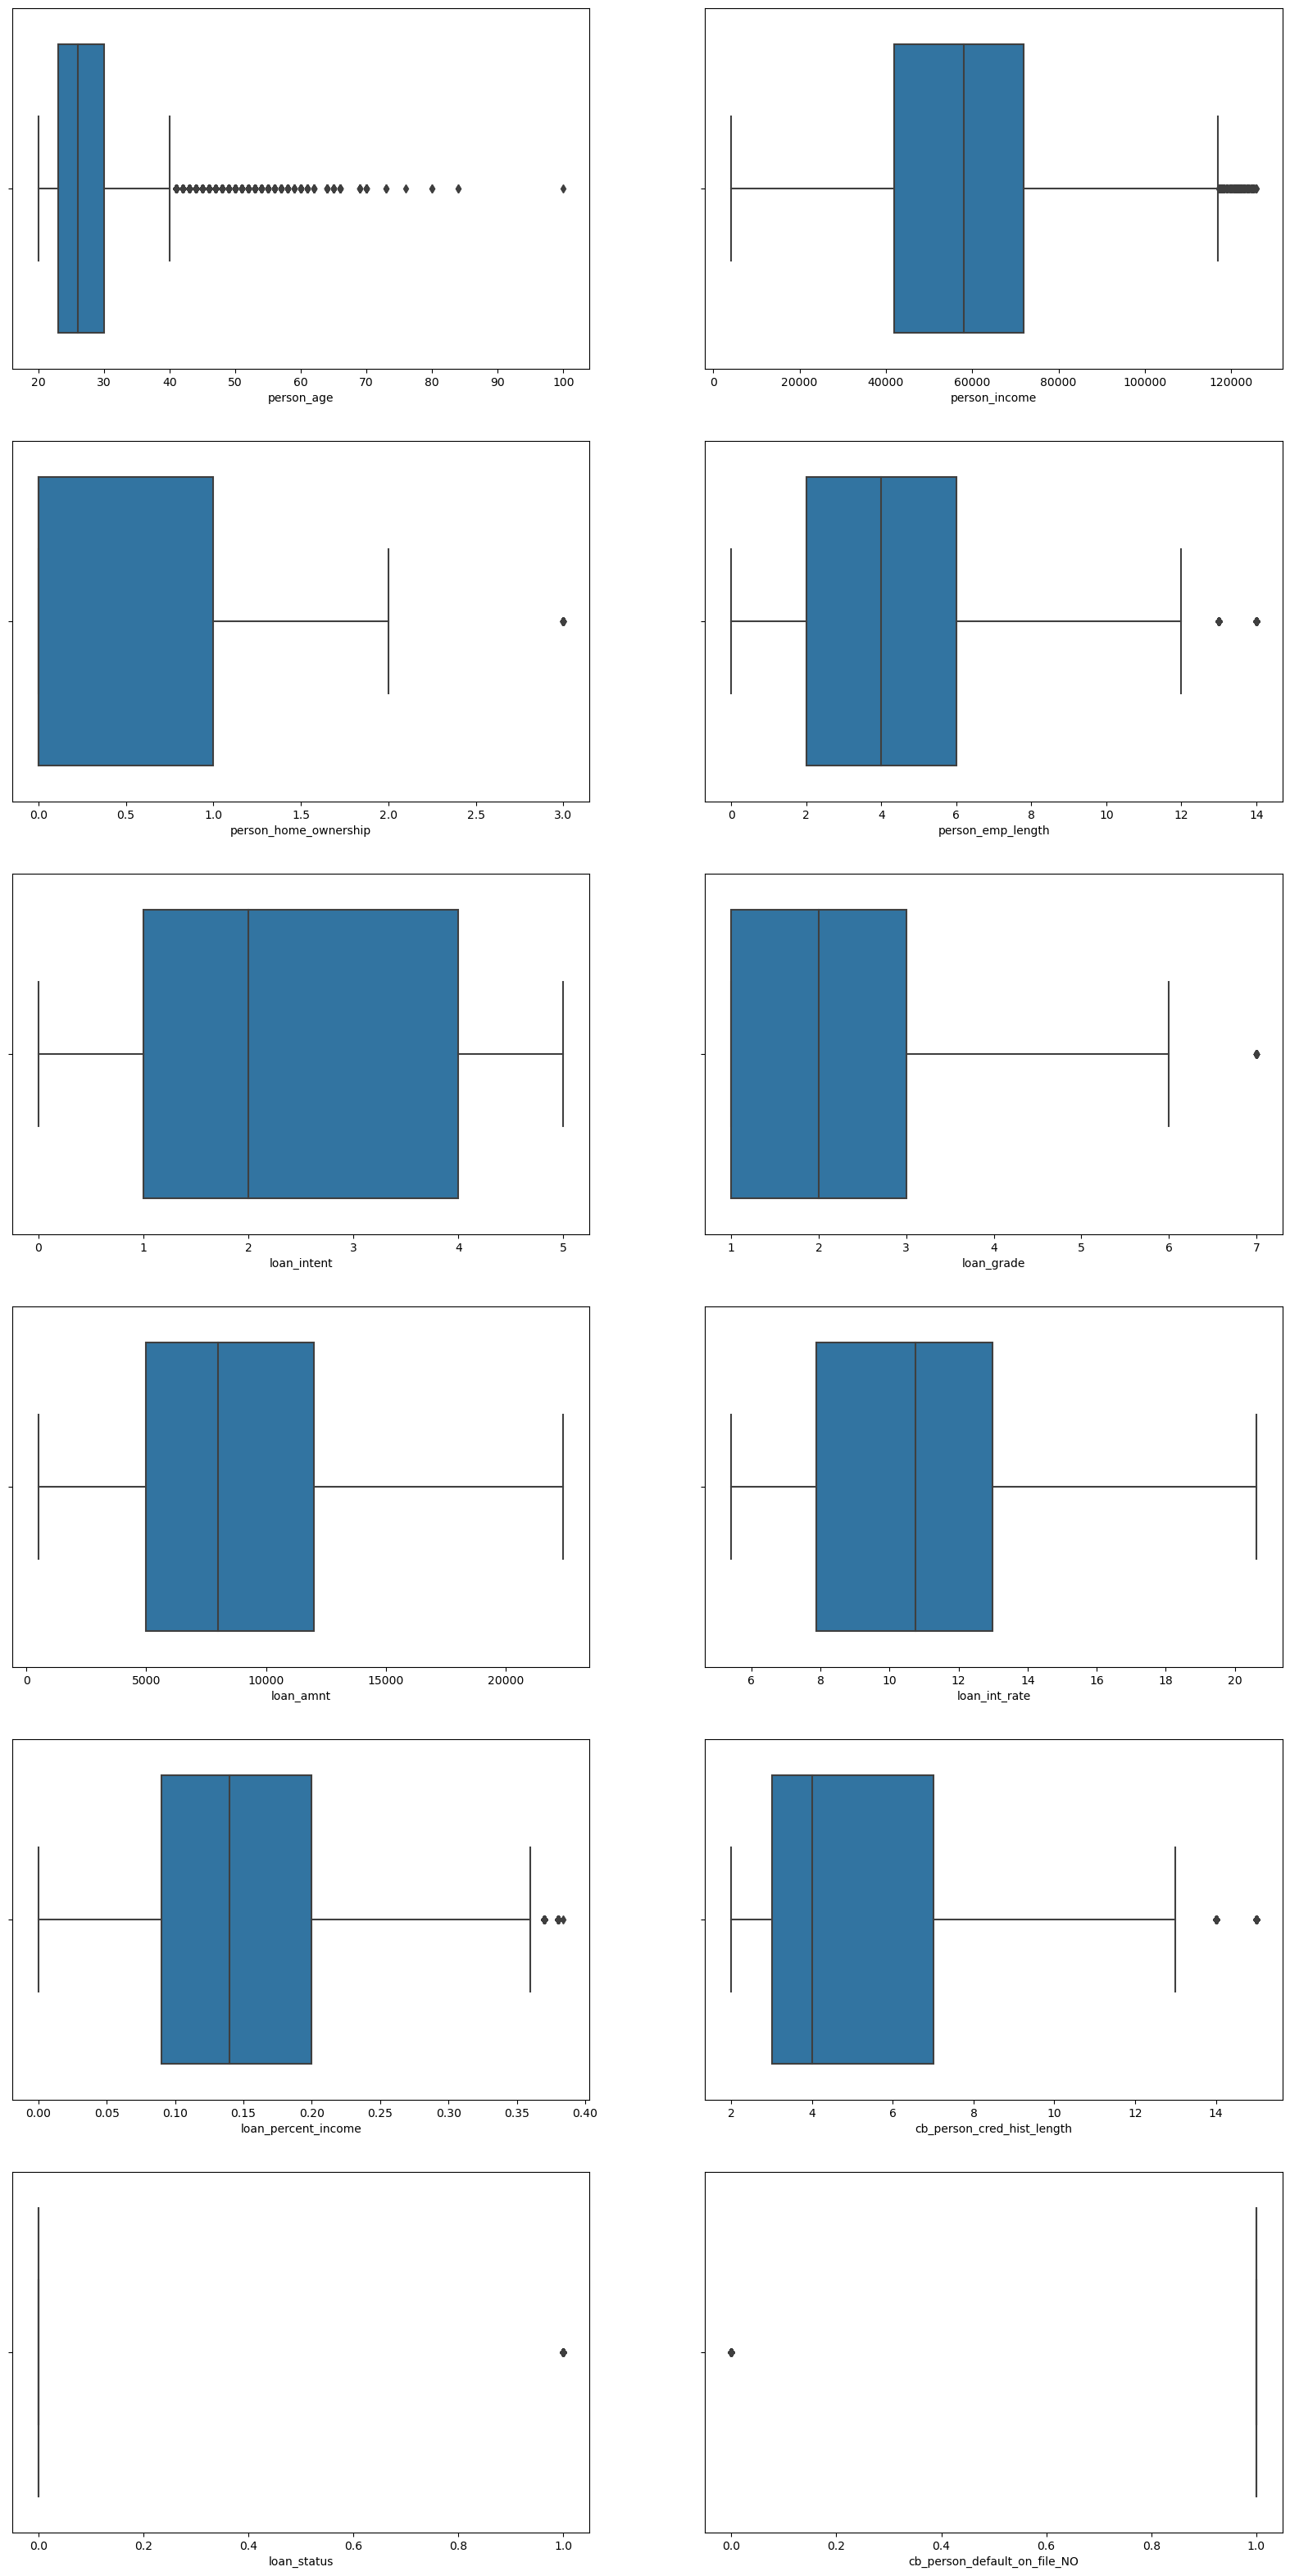

In [26]:
#for outlier
fig,axes = plt.subplots(6,2,figsize=(20,40),sharey=True)
k=0
for i in range(6):
    for j in range(2):
        sns.boxplot(x=data.columns[k],data=data,ax=axes[i][j])
        plt.plot()
        k+=1

In [27]:
# to noramlize the clumns
noramlize_col=['loan_amnt','person_income']
for i in noramlize_col:
    data[i]=(data[i]-(data[i].min()))/(data[i].max()-data[i].min())

In [28]:
data.describe()

person_age  person_income  person_home_ownership  person_emp_length  \
count  58645.000000   58645.000000           58645.000000       58645.000000   
mean      27.550465       0.453960               0.534862           4.405695   
std        6.027756       0.190413               0.604081           3.378671   
min       20.000000       0.000000               0.000000           0.000000   
25%       23.000000       0.310855               0.000000           2.000000   
50%       26.000000       0.442434               0.000000           4.000000   
75%       30.000000       0.557566               1.000000           6.000000   
max      100.000000       1.000000               3.000000          14.000000   

        loan_intent    loan_grade     loan_amnt  loan_int_rate  \
count  58645.000000  58645.000000  58645.000000   58645.000000   
mean       2.198499      2.066638      0.369622      10.671729   
std        1.655736      1.046181      0.207535       3.023759   
min        0.000000      1.000000      0.000000       5.420000   
25%        1.000000      1.000000      0.205479       7.880000   
50%        2.000000      2.000000      0.342466      10.750000   
75%        4.000000      3.000000      0.525114      12.990000   
max        5.000000      7.000000      1.000000      20.620000   

       loan_percent_income  cb_person_cred_hist_length   loan_status  \
count         58645.000000                58645.000000  58645.000000   
mean              0.152588                    5.329065      0.142382   
std               0.081595                    3.226315      0.349445   
min               0.000000                    2.000000      0.000000   
25%               0.090000                    3.000000      0.000000   
50%               0.140000                    4.000000      0.000000   
75%               0.200000                    7.000000      0.000000   
max               0.384000                   15.000000      1.000000   

       cb_person_default_on_file_NO  cb_person_default_on_file_YES  
count                  58645.000000                   58645.000000  
mean                       0.851616                       0.148384  
std                        0.355484                       0.355484  
min                        0.000000                       0.000000  
25%                        1.000000                       0.000000  
50%                        1.000000                       0.000000  
75%                        1.000000                       0.000000  
max                        1.000000                       1.000000

In [29]:
y=data['loan_status']
x=data.drop('loan_status',axis=1)

In [30]:
#now finding correlation of the data
coerr=data.corr()
coerr['loan_status'].sort_values(ascending=False)

loan_status                      1.000000
loan_grade                       0.385908
loan_int_rate                    0.337236
loan_percent_income              0.284882
cb_person_default_on_file_YES    0.186962
loan_amnt                        0.116829
loan_intent                      0.041541
person_age                      -0.001104
cb_person_cred_hist_length      -0.011838
person_emp_length               -0.111882
cb_person_default_on_file_NO    -0.186962
person_income                   -0.213533
person_home_ownership           -0.230392
Name: loan_status, dtype: float64

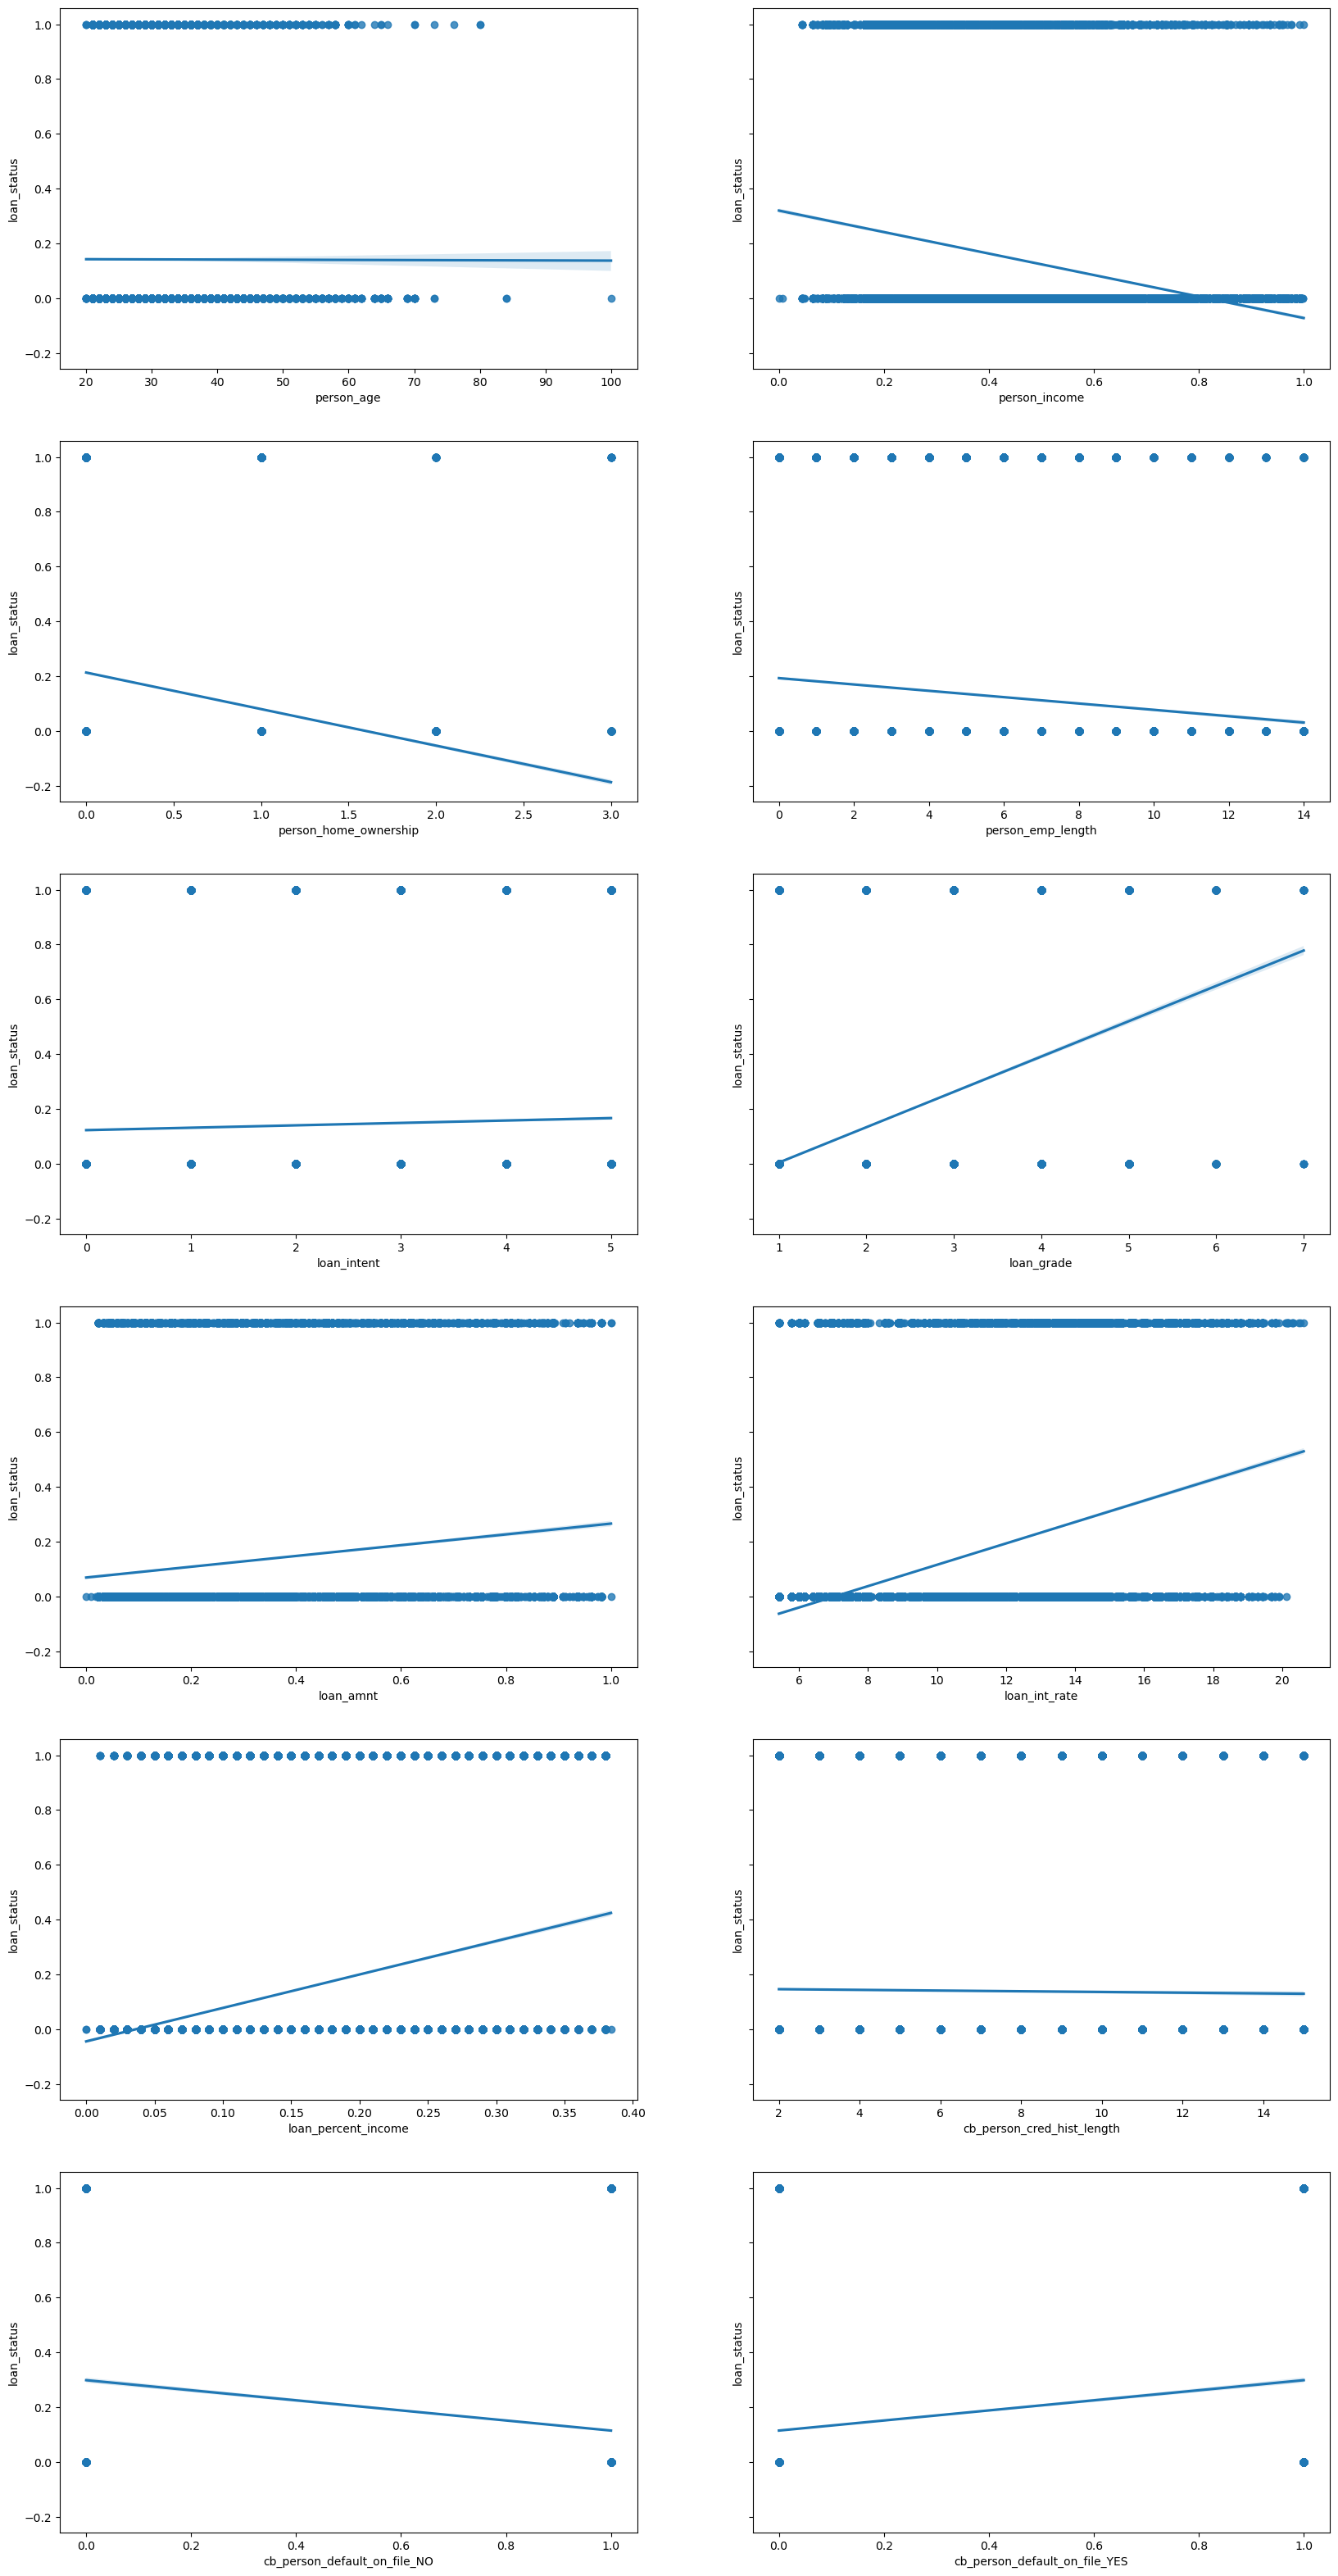

In [31]:
#reg_plot
fig,axes=plt.subplots(6,2,figsize=(20,40),sharey=True)
k=0
for i in range(6):
    for j in range(2):
        sns.regplot(x=x.columns[k],y=y,data=data,ax=axes[i][j])
        plt.plot()
        k+=1

In [32]:
y.value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

In [33]:
#now we can notice that thhere is not aproper distribution of yes over no so data is imbalanced then making imbalanced data balanced
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x,y=smote.fit_resample(x,y)

In [34]:
y.value_counts()

loan_status
0    50295
1    50295
Name: count, dtype: int64

In [35]:
x.shape

(100590, 12)

In [36]:
#now making test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [37]:
y_train.size

67395

In [38]:
y_test.size

33195

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score

In [40]:
#now fitting model to see the results
def check(model):
    y_pred=model.predict(x_test)
    print("the confusion matrix: ", confusion_matrix(y_test,y_pred))
    print("the precision score: ", precision_score(y_test,y_pred))
    print("the recall score ",recall_score(y_test,y_pred))
    print("the accuracy score: ",accuracy_score(y_test,y_pred))

In [41]:
from warnings import filterwarnings
filterwarnings("ignore")

In [42]:
from sklearn.linear_model import LogisticRegressionCV
check(LogisticRegressionCV().fit(x_train,y_train))

the confusion matrix:  [[13090  3599]
 [ 2817 13689]]
the precision score:  0.7918209162424803
the recall score  0.8293347873500545
the accuracy score:  0.8067178791986745


In [43]:
from sklearn.naive_bayes import BernoulliNB
check(BernoulliNB().fit(x_train,y_train))

the confusion matrix:  [[ 9190  7499]
 [ 2784 13722]]
the precision score:  0.6466236275387588
the recall score  0.8313340603416939
the accuracy score:  0.6902244313902696


In [44]:
from sklearn.naive_bayes import GaussianNB
check(GaussianNB().fit(x_train,y_train))

the confusion matrix:  [[13290  3399]
 [ 3543 12963]]
the precision score:  0.7922625595892923
the recall score  0.7853507815339876
the accuracy score:  0.7908721192950745


In [45]:
from sklearn.neighbors import KNeighborsClassifier
check(KNeighborsClassifier(4).fit(x_train,y_train))

the confusion matrix:  [[13787  2902]
 [ 1571 14935]]
the precision score:  0.8373044794528228
the recall score  0.9048224887919545
the accuracy score:  0.8652507907817443


In [46]:
from sklearn.tree import DecisionTreeClassifier
check(DecisionTreeClassifier().fit(x_train,y_train))

the confusion matrix:  [[15293  1396]
 [ 1314 15192]]
the precision score:  0.9158427779117434
the recall score  0.920392584514722
the accuracy score:  0.9183611989757493


In [47]:
from sklearn.tree import ExtraTreeClassifier
check(ExtraTreeClassifier().fit(x_train,y_train))

the confusion matrix:  [[14291  2398]
 [ 2202 14304]]
the precision score:  0.8564243803137349
the recall score  0.8665939658306071
the accuracy score:  0.8614249133905709


In [48]:
from sklearn.ensemble import AdaBoostClassifier
check(AdaBoostClassifier().fit(x_train,y_train))

the confusion matrix:  [[14283  2406]
 [ 2293 14213]]
the precision score:  0.8552259462061496
the recall score  0.8610808190960862
the accuracy score:  0.8584425365265853


In [49]:
from sklearn.ensemble import BaggingClassifier
check(BaggingClassifier().fit(x_train,y_train))

the confusion matrix:  [[16152   537]
 [ 1361 15145]]
the precision score:  0.9657569187603622
the recall score  0.917545135102387
the accuracy score:  0.9428227142641964


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
check(GradientBoostingClassifier().fit(x_train,y_train))

the confusion matrix:  [[15118  1571]
 [ 1870 14636]]
the precision score:  0.9030665761707904
the recall score  0.8867078638071004
the accuracy score:  0.8963398102123814


In [51]:
from sklearn.ensemble import HistGradientBoostingClassifier
check(HistGradientBoostingClassifier().fit(x_train,y_train))

the confusion matrix:  [[16183   506]
 [ 1136 15370]]
the precision score:  0.9681279919375158
the recall score  0.9311765418635648
the accuracy score:  0.9505347190841994


In [52]:
from sklearn.ensemble import RandomForestClassifier
check(RandomForestClassifier().fit(x_train,y_train))

the confusion matrix:  [[15977   712]
 [ 1139 15367]]
the precision score:  0.9557186392188569
the recall score  0.9309947897734158
the accuracy score:  0.9442385901491188


In [127]:
from xgboost import XGBClassifier
check(XGBClassifier(objective='binary:logistic', random_state=42).fit(x_train,y_train))

the confusion matrix:  [[16322   367]
 [  950 15556]]
the precision score:  0.9769515794762293
the recall score  0.942445171452805
the accuracy score:  0.9603253502033439


In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
#histgradient hyperparameter tuning
xgb=XGBClassifier()
parameters = {
     'n_estimators': np.arange(100, 1000, 10),        # Larger step size for fewer combinations
    'max_depth': np.arange(3, 10),                   
    'learning_rate': np.arange(0.01, 0.4, 0.005),     # Adjusted step for learning_rate
    'subsample': np.arange(0.5, 1.1, 0.05),           
    'colsample_bytree': np.arange(0.5, 1.1, 0.05),    
    'gamma': np.arange(0.1, 1.1, 0.05),               # Adjusted step for gamma
    'lambda': np.arange(1, 10),
 }

ml_model = RandomizedSearchCV(estimator           = xgb, 
                                   param_distributions = parameters, 
                                   scoring             = 'roc_auc', 
                                   n_iter              = 200, 
                                   cv                  = 3, 
                                   verbose             = 1, 
                                   n_jobs              = -1, 
                                   random_state        = 42)

ml_model.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
       620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
       750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
       880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]),
                                        'subsample': array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
       1.05, 1.1 ])},
                   random_state=42, scoring='roc_auc', verbose=1)

In [185]:
ml_model.best_score_

0.9883244817402557

In [186]:
ml_model=ml_model.best_estimator_

ml model comes to be best is Hist Gradient 

In [68]:
#now for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight

In [97]:
model = Sequential([
    Dense(units=128, 
          activation='relu', 
          input_shape=(12,), 
          kernel_initializer='he_normal',  
          bias_initializer='ones', 
          kernel_regularizer=regularizers.l2(0.01)),  
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=64, 
          activation='relu', 
          kernel_initializer='he_normal',
          bias_initializer='ones',
          kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=32, 
          activation='relu', 
          kernel_initializer='he_normal',
          bias_initializer='ones',
          kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(units=1, 
          activation='sigmoid', 
          kernel_initializer='glorot_uniform',  
          bias_initializer='zeros')  
])



In [98]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=150,
                    batch_size=64,
                 )  


Epoch 1/150
1054/1054 [==============================] - 7s 5ms/step - loss: 1.6533 - accuracy: 0.7465 - val_loss: 0.5585 - val_accuracy: 0.8047
Epoch 2/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4998 - accuracy: 0.7974 - val_loss: 0.4755 - val_accuracy: 0.7847
Epoch 3/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4636 - accuracy: 0.8001 - val_loss: 0.4440 - val_accuracy: 0.8056
Epoch 4/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4557 - accuracy: 0.8027 - val_loss: 0.5212 - val_accuracy: 0.7693
Epoch 5/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4547 - accuracy: 0.8000 - val_loss: 0.4919 - val_accuracy: 0.7720
Epoch 6/150
1054/1054 [==============================] - 5s 4ms/step - loss: 0.4518 - accuracy: 0.8026 - val_loss: 0.6062 - val_accuracy: 0.7415
Epoch 7/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4521 - accuracy: 0.8016 - val_loss: 0.6292 - val_ac

1054/1054 [==============================] - 5s 5ms/step - loss: 0.4342 - accuracy: 0.8150 - val_loss: 0.4306 - val_accuracy: 0.8041
Epoch 58/150
1054/1054 [==============================] - 5s 4ms/step - loss: 0.4232 - accuracy: 0.8193 - val_loss: 0.5002 - val_accuracy: 0.7703
Epoch 59/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4235 - accuracy: 0.8202 - val_loss: 0.8314 - val_accuracy: 0.6715
Epoch 60/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4253 - accuracy: 0.8177 - val_loss: 0.4363 - val_accuracy: 0.8005
Epoch 61/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4248 - accuracy: 0.8189 - val_loss: 0.4263 - val_accuracy: 0.8146
Epoch 62/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4224 - accuracy: 0.8203 - val_loss: 0.4184 - val_accuracy: 0.8187
Epoch 63/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4220 - accuracy: 0.8208 - val_loss: 0.5317 - val_accuracy

1054/1054 [==============================] - 4s 4ms/step - loss: 0.4197 - accuracy: 0.8223 - val_loss: 0.4949 - val_accuracy: 0.7735
Epoch 114/150
1054/1054 [==============================] - 5s 5ms/step - loss: 0.4217 - accuracy: 0.8193 - val_loss: 0.5989 - val_accuracy: 0.7555
Epoch 115/150
1054/1054 [==============================] - 8s 7ms/step - loss: 0.4212 - accuracy: 0.8207 - val_loss: 0.3974 - val_accuracy: 0.8311
Epoch 116/150
1054/1054 [==============================] - 7s 7ms/step - loss: 0.4215 - accuracy: 0.8218 - val_loss: 0.5266 - val_accuracy: 0.7604
Epoch 117/150
1054/1054 [==============================] - 5s 5ms/step - loss: 0.4200 - accuracy: 0.8209 - val_loss: 0.5451 - val_accuracy: 0.7858
Epoch 118/150
1054/1054 [==============================] - 4s 4ms/step - loss: 0.4224 - accuracy: 0.8199 - val_loss: 0.6663 - val_accuracy: 0.6761
Epoch 119/150
1054/1054 [==============================] - 6s 6ms/step - loss: 0.4264 - accuracy: 0.8191 - val_loss: 0.4508 - val_ac

In [99]:
history.history

{'loss': [1.653290033340454,
  0.49984803795814514,
  0.4636121690273285,
  0.4557058811187744,
  0.4546562433242798,
  0.4517984092235565,
  0.45209330320358276,
  0.4451931118965149,
  0.4472147524356842,
  0.4479520320892334,
  0.443701833486557,
  0.4438103437423706,
  0.4437525272369385,
  0.444894015789032,
  0.44420233368873596,
  0.4416351318359375,
  0.44334685802459717,
  0.441986620426178,
  0.44090738892555237,
  0.4396859407424927,
  0.4450843036174774,
  0.4418051242828369,
  0.4404752552509308,
  0.43552884459495544,
  0.43708762526512146,
  0.43723392486572266,
  0.4342908561229706,
  0.43177399039268494,
  0.4313250184059143,
  0.4298371970653534,
  0.43035688996315,
  0.4303162097930908,
  0.4284389019012451,
  0.4289872348308563,
  0.4283093810081482,
  0.4287812113761902,
  0.42665842175483704,
  0.42439547181129456,
  0.42721134424209595,
  0.42624345421791077,
  0.42398935556411743,
  0.446071594953537,
  0.4330293536186218,
  0.43088704347610474,
  0.427786827087

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [187]:
model.fit(x,y)

3144/3144 [==============================] - 17s 5ms/step - loss: 0.4439 - accuracy: 0.8111


Now for test data

In [188]:
test=pd.read_csv("test.csv")

In [189]:
test.head(3)

id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   

       loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0  HOMEIMPROVEMENT          F      25000          15.76                 0.36   
1         PERSONAL          C      10000          12.68                 0.10   
2          VENTURE          E       4000          17.19                 0.13   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                           2  
1                         Y                           4  
2                         Y                           2

In [190]:
test_data=test.drop('id',axis=1)

In [191]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  39098 non-null  int64  
 1   person_income               39098 non-null  int64  
 2   person_home_ownership       39098 non-null  object 
 3   person_emp_length           39098 non-null  float64
 4   loan_intent                 39098 non-null  object 
 5   loan_grade                  39098 non-null  object 
 6   loan_amnt                   39098 non-null  int64  
 7   loan_int_rate               39098 non-null  float64
 8   loan_percent_income         39098 non-null  float64
 9   cb_person_default_on_file   39098 non-null  object 
 10  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.3+ MB


No null values present

In [192]:
test_data['person_home_ownership']=test_data['person_home_ownership'].map({'RENT':0,'MORTGAGE':1,'OWN':2,'OTHER':3})

In [193]:
test_data['loan_intent']=test_data['loan_intent'].map({'EDUCATION':0,'MEDICAL':1,'PERSONAL':2,'VENTURE':3,'DEBTCONSOLIDATION':4,'HOMEIMPROVEMENT':5})

In [194]:
test_data['loan_grade']=test_data['loan_grade'].map({'unknown':0,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [195]:
test_data['cb_person_default_on_file_NO']=test_data['cb_person_default_on_file'].map({'N':1,'Y':0})
test_data['cb_person_default_on_file_YES']=test_data['cb_person_default_on_file'].map({'Y':1,'N':0})
test_data.drop('cb_person_default_on_file',axis=1,inplace=True)

In [196]:
for i in outliers_present:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    maximum=q3+1.5*iqr
    minimum=q1-1.5*iqr
    
    test_data[i]= np.where(test_data[i]>=maximum,data[i].median(),test_data[i])
    test_data[i]= np.where(test_data[i]<=minimum,data[i].median(),test_data[i])

In [197]:
test_data['person_age']=np.where(test_data['person_age']>100,100,test_data['person_age'])

In [198]:
noramlize_col=['loan_amnt','person_income']
for i in noramlize_col:
    test_data[i]=(test_data[i]-(data[i].min()))/(data[i].max()-data[i].min())

In [199]:
test['result']=ml_model.predict(test_data)

In [200]:
#y_pred=model.predict(test_data).ravel()
#test['result'] = (y_pred > 0.5).astype(int)


In [201]:
test.head(3)

id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   

       loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0  HOMEIMPROVEMENT          F      25000          15.76                 0.36   
1         PERSONAL          C      10000          12.68                 0.10   
2          VENTURE          E       4000          17.19                 0.13   

  cb_person_default_on_file  cb_person_cred_hist_length  result  
0                         N                           2       1  
1                         Y                           4       0  
2                         Y                           2       0

In [202]:
res={'id':test['id'],'loan_status':test['result']}
df=pd.DataFrame(res)

In [203]:
df.to_csv('result.csv',index=False)